In [280]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
#os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\Loan Prediciton_AnalyticsVidhya\\train_aox2Jxw')
os.chdir('C:\\Users\\Administrator\\Desktop\\Data\\Loan Prediction Analytics Vidhya')
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [281]:
dataset=pd.read_csv('train.csv')
dataset.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   
2               45                1497      24-08-85   Self employed   
3               45                1501      30-12-93   Self employed   
4               45                1495      09-12-77   Self employed   

  DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  Aadhar_flag  \
0      03-08-18         6              1998                  1            1   
1      26-09-18         6              1998                  1            1   
2      01-08-18         6              1998                  1            1   
3      26-10-18         6              1998                  1            1   
4      26-09-18         6              1998                  1            1   

   PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
0         0             0             0              0                  0   
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  PERFORM_CNS.SCORE.DESCRIPTION  PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT  \
0                  0                    0                      0   
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   PRI.DISBURSED.AMOUNT  SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS  SEC.OVERDUE.ACCTS  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   D

In [282]:
## Checking the distribution of the target variable
dataset['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [283]:
print('Shape of the dataset {}'.format(dataset.shape))

Shape of the dataset (233154, 41)


In [284]:
## Checking for the null values
null_columns=[col for col in dataset.columns if dataset[col].isnull().sum()>0]
print('List of columns which contains null values',null_columns)

List of columns which contains null values ['Employment.Type']


In [6]:
## Validating the columns

In [285]:
len(dataset['UniqueID'].unique())

233154

In [8]:
## Disbursed_amount Column

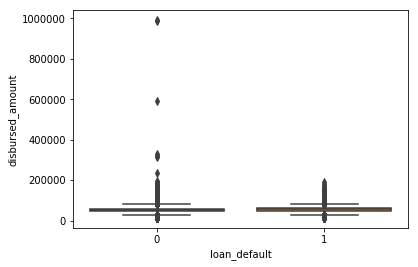

In [9]:
ax=sns.boxplot(x=dataset['loan_default'],y=dataset['disbursed_amount'],data=dataset)

In [10]:
## Asset Cost Column

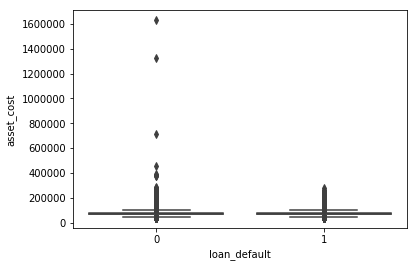

In [11]:
ax=sns.boxplot(x=dataset['loan_default'],y=dataset['asset_cost'],data=dataset)

In [12]:
## LTV

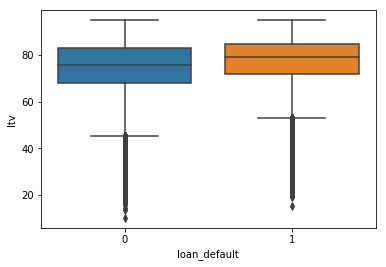

In [13]:
ax=sns.boxplot(x=dataset['loan_default'],y=dataset['ltv'],data=dataset)

In [14]:
## Branch ID

In [15]:
print('Shape is {shape}\n and the values are \n{value}'.format(value=dataset['branch_id'].unique(),shape=len(dataset['branch_id'].unique())))

Shape is 82
 and the values are 
[ 67  78  34 130  74  11   5  20  63  48  79   3  42 142  36  16 146 147
  65   9   1 152  29  10  70  19   7  85  61  17   8 153  18 162  68  72
  64   2 160 251 103 104 120 136  77  13 138 135  73 248  15 165  62  76
 105 249 250 255 254  82 158 159 117 202 259 207  35  69  97  43 257 258
 260 111  66 261 101  14 121 217  84 100]


In [16]:
## Supplier ID

In [17]:
print('Shape is {shape}\n and the values are \n{value}'.format(value=dataset['supplier_id'].unique(),shape=len(dataset['supplier_id'].unique())))

Shape is 2953
 and the values are 
[22807 22744 17014 ... 23618 22289 24031]


In [18]:
## Manufacturer ID

In [19]:
print('Shape is {shape}\n and the values are \n{value}'.format(value=dataset['manufacturer_id'].unique(),shape=len(dataset['manufacturer_id'].unique())))

Shape is 11
 and the values are 
[ 45  86  48  51 120  49 145  67 153 156 152]


In [20]:
## Current_pincode_ID

In [21]:
print('Shape is {shape}\n and the values are \n{value}'.format(value=dataset['Current_pincode_ID'].unique(),shape=len(dataset['Current_pincode_ID'].unique())))

Shape is 6698
 and the values are 
[1441 1502 1497 ... 3586  680  693]


In [22]:
## Current_pincode_ID

In [23]:
print('Shape is {shape}\n and the values are \n{value}'.format(value=dataset['Current_pincode_ID'].unique(),shape=len(dataset['Current_pincode_ID'].unique())))

Shape is 6698
 and the values are 
[1441 1502 1497 ... 3586  680  693]


import re
dataset['year']=[re.sub(r'[(\d\-)+][(\d\-)+]-','',dataset['Date.of.Birth'][i]) for i in range(len(dataset['Date.of.Birth']))]
dataset['year']=dataset['year'].astype(int)

In [24]:
## Date of Birth

In [25]:
from datetime import datetime

from datetime import datetime
dataset['DateofBirth']=[datetime.strptime(dataset['Date.of.Birth'][i],'%d-%m-%y') for i in range(len(dataset['Date.of.Birth']))]

In [26]:
import datetime
x = datetime.datetime.now()
currentyear=int(x.strftime("%Y"))
#currentyear=int(currentyear)
currentyear
dataset['DateofBirth']=pd.to_datetime(dataset['Date.of.Birth'])
dataset['year'] = dataset['DateofBirth'].dt.year
dataset['age']=[currentyear-(int(dataset['year'][i])-100) if dataset['year'][i]>2000 else currentyear-int(dataset['year'][i]) for i in range(len(dataset['year']))]

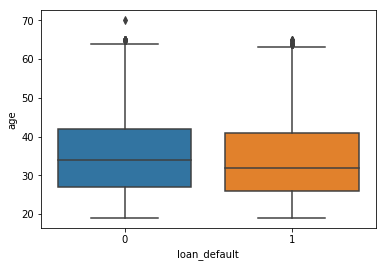

In [27]:
ax=sns.boxplot(x=dataset['loan_default'],y=dataset['age'],data=dataset)

Analysis for column MobileNo_Avl_Flag
Unique values present in MobileNo_Avl_Flag are [1]
Analysis for column Aadhar_flag
Unique values present in Aadhar_flag are [1 0]


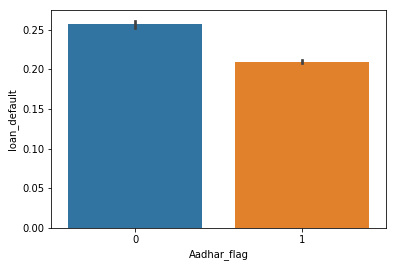

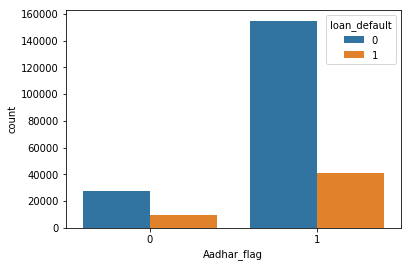

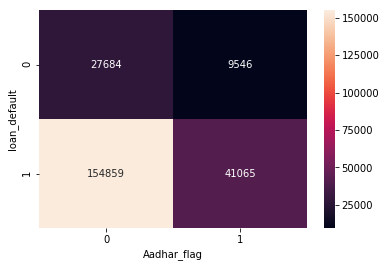

ODD's Ratio of Aadhar_flag
0.7690291237905519
Analysis for column PAN_flag
Unique values present in PAN_flag are [0 1]


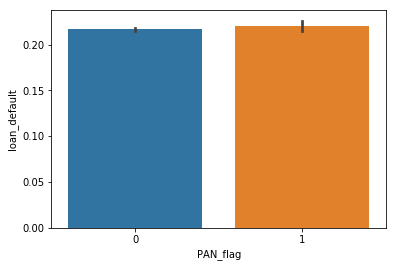

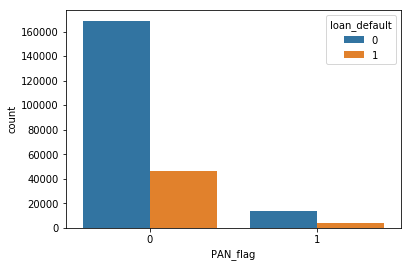

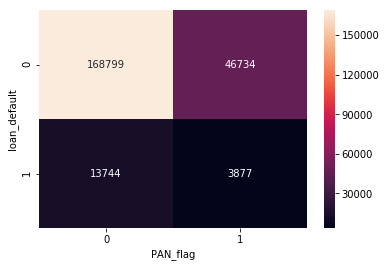

ODD's Ratio of PAN_flag
1.0188718647453279
Analysis for column VoterID_flag
Unique values present in VoterID_flag are [0 1]


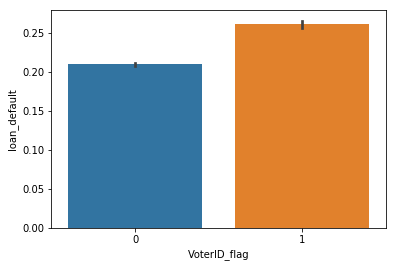

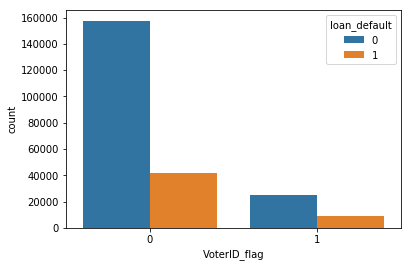

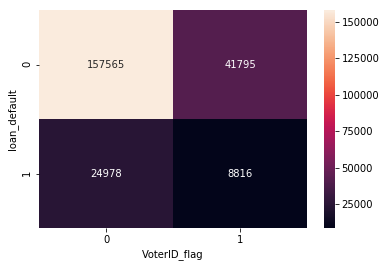

ODD's Ratio of VoterID_flag
1.3306055925697446
Analysis for column Passport_flag
Unique values present in Passport_flag are [0 1]


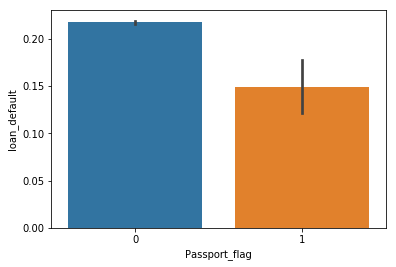

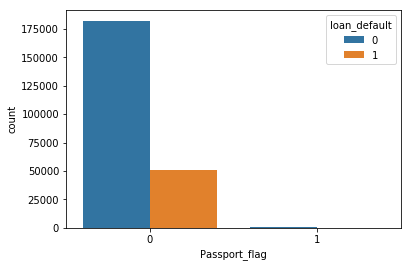

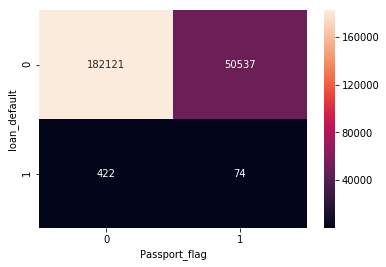

ODD's Ratio of Passport_flag
0.6319312573482129


In [29]:
catvariables=['MobileNo_Avl_Flag','Aadhar_flag','PAN_flag','VoterID_flag','Passport_flag']
for i in catvariables:
    categoricalvariables(dataset,'loan_default',i)

In [30]:
['PRI.ACTIVE.ACCTS_Transformed','PRI.OVERDUE.ACCTS_Transformed']

['PRI.ACTIVE.ACCTS_Transformed', 'PRI.OVERDUE.ACCTS_Transformed']

In [31]:
dataset.head(2)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   

  DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  Aadhar_flag  \
0      03-08-18         6              1998                  1            1   
1      26-09-18         6              1998                  1            1   

   PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
0         0             0             0              0                  0   
1         0             0             0              0                598   

  PERFORM_CNS.SCORE.DESCRIPTION  PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   

   PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT  \
0                  0                    0                      0   
1                  1                27600                  50200   

   PRI.DISBURSED.AMOUNT  SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS  SEC.OVERDUE.ACCTS  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   

   SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0                    0                      0                     0   
1                    0                      0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS AVERAGE.ACCT.AGE CREDIT.HISTORY.LENGTH  \
0                                    0        0yrs 0mon             0yrs 0mon   
1                                    1       1yrs 11mon            1yrs 11mon   

   NO.OF_INQUIRIES  loan_default DateofBirth  year  age  
0                0             0  1984-01-01  1984   35  
1                0             1  1985-07-31  1985   34

In [32]:
dataset['PRI.NO.OF.ACCTS_Transformed']=['<3' if dataset['PRI.NO.OF.ACCTS'][i]<=3 else '3 and 7' if dataset['PRI.NO.OF.ACCTS'][i]>3 and dataset['PRI.NO.OF.ACCTS'][i]<=7 else '>7' for i in range(len(dataset['PRI.NO.OF.ACCTS']))]

In [33]:
dataset['PRI.ACTIVE.ACCTS_Transformed']=['1' if dataset['PRI.ACTIVE.ACCTS'][i]<=1 else '2' if dataset['PRI.ACTIVE.ACCTS'][i]>1 and dataset['PRI.ACTIVE.ACCTS'][i]<=2 else '>2' for i in range(len(dataset['PRI.ACTIVE.ACCTS']))]

In [34]:
dataset['PRI.OVERDUE.ACCTS_Transformed']=['0' if dataset['PRI.OVERDUE.ACCTS'][i]<1 else '1-5' if dataset['PRI.OVERDUE.ACCTS'][i]>=1 and dataset['PRI.OVERDUE.ACCTS'][i]<=5 else '>5' for i in range(len(dataset['PRI.OVERDUE.ACCTS']))]

## PRI.CURRENT.BALANCE

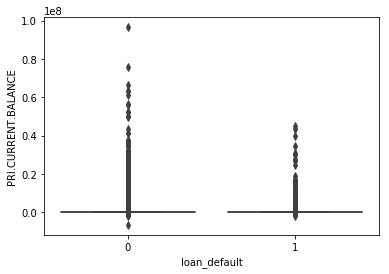

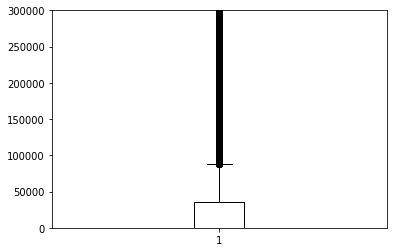

In [157]:
#### plt.figure(figsize=(16, 6))
sns.boxplot(x=dataset['loan_default'],y=dataset['PRI.CURRENT.BALANCE'])
plt.show()
#plt.ylim(0,100)
plt.boxplot(dataset['PRI.CURRENT.BALANCE'])
plt.ylim(0,300000)
plt.show()

In [164]:
dataset['PRI.CURRENT.BALANCE_Transformed']=['Negative' if dataset['PRI.CURRENT.BALANCE'][i]<1 else 'Low' if dataset['PRI.CURRENT.BALANCE'][i]>=1 and dataset['PRI.CURRENT.BALANCE'][i]<=40000 else 'Medium' if dataset['PRI.CURRENT.BALANCE'][i]>40000 and dataset['PRI.CURRENT.BALANCE'][i]<=90000 else 'High' for i in range(len(dataset['PRI.CURRENT.BALANCE']))]

### PRI.SANCTIONED.AMOUNT

In [131]:
dataset.loc[(dataset['PRI.SANCTIONED.AMOUNT']>0) & (dataset['PRI.SANCTIONED.AMOUNT']<1000000000),:].shape

(95057, 48)

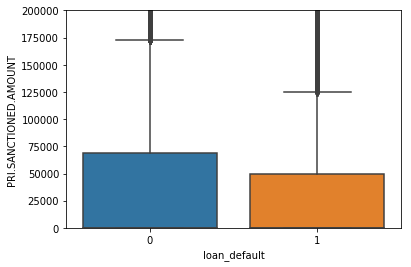

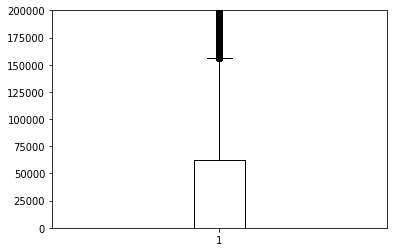

(array([2.33151e+05, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.e+00, 1.e+08, 2.e+08, 3.e+08, 4.e+08, 5.e+08, 6.e+08, 7.e+08,
        8.e+08, 9.e+08, 1.e+09]),
 <a list of 10 Patch objects>)

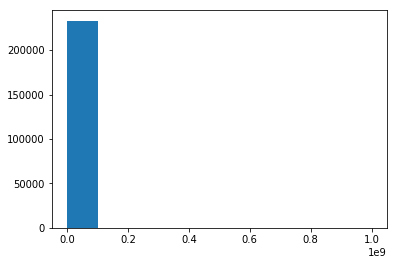

In [162]:
#### plt.figure(figsize=(16, 6))
sns.boxplot(x=dataset['loan_default'],y=dataset['PRI.SANCTIONED.AMOUNT'])
plt.ylim(0,200000)
plt.show()
#plt.ylim(0,100)
plt.boxplot(dataset['PRI.SANCTIONED.AMOUNT'])
plt.ylim(0,200000)
plt.show()
plt.hist(dataset['PRI.SANCTIONED.AMOUNT'])
#plt.xlim(300,100000)

In [163]:
dataset['PRI.SANCTIONED.AMOUNT_Transformed']=['Negative' if dataset['PRI.SANCTIONED.AMOUNT'][i]<1 else 'Low' if dataset['PRI.SANCTIONED.AMOUNT'][i]>=1 and dataset['PRI.SANCTIONED.AMOUNT'][i]<=60000 else 'Medium' if dataset['PRI.SANCTIONED.AMOUNT'][i]>60000 and dataset['PRI.SANCTIONED.AMOUNT'][i]<=160000 else 'High' for i in range(len(dataset['PRI.SANCTIONED.AMOUNT']))]

## PRI.DISBURSED.AMOUNT

In [193]:
dataset['morethansanctioned']=['yes' if dataset['PRI.DISBURSED.AMOUNT'][i]>dataset['PRI.SANCTIONED.AMOUNT'][i] else 'no' for i in range(len(dataset['PRI.SANCTIONED.AMOUNT']))]

0    3580
1     686
Name: loan_default, dtype: int64


(0, 100000)

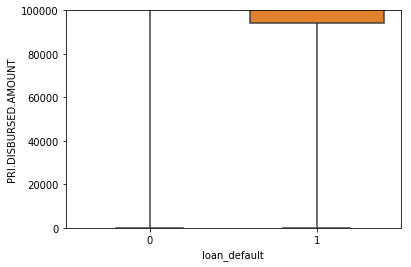

In [195]:
disbursed=dataset.loc[dataset['PRI.DISBURSED.AMOUNT']>dataset['PRI.SANCTIONED.AMOUNT'],:]
print(disbursed['loan_default'].value_counts())
sns.boxplot(x=disbursed['loan_default'],y=disbursed['PRI.DISBURSED.AMOUNT'])
plt.ylim(0,100000)

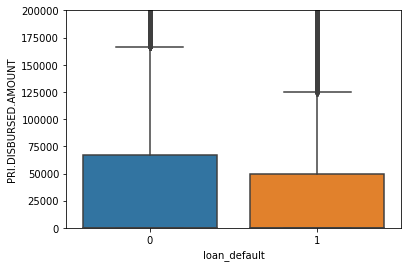

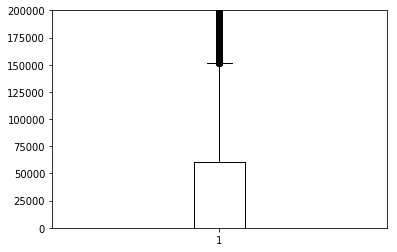

(array([2.33151e+05, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.e+00, 1.e+08, 2.e+08, 3.e+08, 4.e+08, 5.e+08, 6.e+08, 7.e+08,
        8.e+08, 9.e+08, 1.e+09]),
 <a list of 10 Patch objects>)

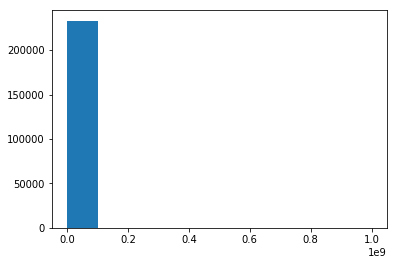

In [199]:
#### plt.figure(figsize=(16, 6))
sns.boxplot(x=dataset['loan_default'],y=dataset['PRI.DISBURSED.AMOUNT'])
plt.ylim(0,200000)
plt.show()
#plt.ylim(0,100)
plt.boxplot(dataset['PRI.DISBURSED.AMOUNT'])
plt.ylim(0,200000)
plt.show()
plt.hist(dataset['PRI.DISBURSED.AMOUNT'])
#plt.xlim(300,100000)

In [200]:
dataset['PRI.DISBURSED.AMOUNT_Transformed']=['Negative' if dataset['PRI.DISBURSED.AMOUNT'][i]<1 else 'Low' if dataset['PRI.DISBURSED.AMOUNT'][i]>=1 and dataset['PRI.DISBURSED.AMOUNT'][i]<=60000 else 'Medium' if dataset['PRI.DISBURSED.AMOUNT'][i]>60000 and dataset['PRI.DISBURSED.AMOUNT'][i]<=160000 else 'High' for i in range(len(dataset['PRI.DISBURSED.AMOUNT']))]

d=dataset.loc[:2000,['PRI.CURRENT.BALANCE','loan_default']]
X_1=d.loc[:,['PRI.CURRENT.BALANCE']]
Y_1=d.loc[:,['loan_default']]
X_1.shape,Y_1.shape

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

estimator = tree.DecisionTreeClassifier()
estimator.fit(X_1,Y_1)
#estimator_nonlimited = clf.estimators_[5]

graph = Source(tree.export_graphviz(estimator, out_file=None
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [56]:
X.shape

(178, 13)

In [201]:
dataset.head(1)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   

  DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  Aadhar_flag  \
0      03-08-18         6              1998                  1            1   

   PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
0         0             0             0              0                  0   

  PERFORM_CNS.SCORE.DESCRIPTION  PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS  \
0   No Bureau History Available                0                 0   

   PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT  \
0                  0                    0                      0   

   PRI.DISBURSED.AMOUNT  SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS  SEC.OVERDUE.ACCTS  \
0                     0                0                 0                  0   

   SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0                    0                      0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS AVERAGE.ACCT.AGE CREDIT.HISTORY.LENGTH  \
0                                    0        0yrs 0mon             0yrs 0mon   

   NO.OF_INQUIRIES  loan_default DateofBirth  year  age  \
0                0             0  1984-01-01  1984   35   

  PRI.NO.OF.ACCTS_Transformed PRI.ACTIVE.ACCTS_Transformed  \
0                          <3                            1   

  PRI.OVERDUE.ACCTS_Transformed PRI.CURRENT.BALANCE_Transformed  \
0                             0                        Negative   

  PRI.SANCTIONED.AMOUNT_Transformed morethansanctioned  \
0                          Negative                 no   

  PRI.DISBURSED.AMOUNT_Transformed  
0                         Negative

In [230]:
dataset.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   
2               45                1497      24-08-85   Self employed   
3               45                1501      30-12-93   Self employed   
4               45                1495      09-12-77   Self employed   

  DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  Aadhar_flag  \
0      03-08-18         6              1998                  1            1   
1      26-09-18         6              1998                  1            1   
2      01-08-18         6              1998                  1            1   
3      26-10-18         6              1998                  1            1   
4      26-09-18         6              1998                  1            1   

   PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
0         0             0             0              0                  0   
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  PERFORM_CNS.SCORE.DESCRIPTION  PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT  \
0                  0                    0                      0   
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   PRI.DISBURSED.AMOUNT  SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS  SEC.OVERDUE.ACCTS  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   D

In [234]:
dataset['NewAccountsLast6Months']=[0 if dataset['NEW.ACCTS.IN.LAST.SIX.MONTHS'][i]==0 else 1 for i in range(len(dataset['NEW.ACCTS.IN.LAST.SIX.MONTHS']))]

In [236]:
dataset['DefaultedLast6Months']=[1 if dataset['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'][i]==0 else 1 for i in range(len(dataset['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']))]

In [257]:
str = "h3110 23 cat 444.4 rabbit 11 2 dog"
[int(s) for s in str.split() if s.isdigit()]


[23, 11, 2]

In [255]:
dataset.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   
2               45                1497      24-08-85   Self employed   
3               45                1501      30-12-93   Self employed   
4               45                1495      09-12-77   Self employed   

  DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  Aadhar_flag  \
0      03-08-18         6              1998                  1            1   
1      26-09-18         6              1998                  1            1   
2      01-08-18         6              1998                  1            1   
3      26-10-18         6              1998                  1            1   
4      26-09-18         6              1998                  1            1   

   PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
0         0             0             0              0                  0   
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  PERFORM_CNS.SCORE.DESCRIPTION  PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT  \
0                  0                    0                      0   
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   PRI.DISBURSED.AMOUNT  SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS  SEC.OVERDUE.ACCTS  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   D

In [43]:
dataset['AccountAge']=[dataset['AVERAGE.ACCT.AGE'][i].replace('yrs','') for i in range(len(dataset['AVERAGE.ACCT.AGE']))]
dataset['AccountAge']=[dataset['AccountAge'][i].replace('mon','') for i in range(len(dataset['AccountAge']))]
list_age=[]
for i in range(len(dataset['AccountAge'])):
    b=[]
    for s in dataset['AccountAge'][i].split():
        if s.isdigit():
            b.append(s)
    age=np.add(np.multiply(int(b[0]),12),int(b[1]))
    list_age.append(age)  
dataset['AccountAge']=list_age

In [45]:
dataset['CreditHistoryAge']=[dataset['CREDIT.HISTORY.LENGTH'][i].replace('yrs','') for i in range(len(dataset['CREDIT.HISTORY.LENGTH']))]
dataset['CreditHistoryAge']=[dataset['CREDIT.HISTORY.LENGTH'][i].replace('mon','') for i in range(len(dataset['CREDIT.HISTORY.LENGTH']))]
list_age=[]
for i in range(len(dataset['CreditHistoryAge'])):
    b=[]
    for s in dataset['CreditHistoryAge'][i].split():
        if s.isdigit():
            b.append(s)
    age=np.add(np.multiply(int(b[0]),12),int(b[1]))
    list_age.append(age)  
dataset['CreditHistoryAge']=list_age

IndexError: list index out of range

In [30]:
np.add(np.multiply(12,2),12)

36

In [265]:
dataset['AccountAge'][0:2]

0     0 0
1    1 11
Name: AccountAge, dtype: object